In [3]:
import numpy as np
import cv2
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import time
import scipy.io
from scipy.sparse import spdiags
import glob

In [19]:
! pip list

Package              Version
-------------------- -----------
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
attrs                21.4.0
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               5.0.1
certifi              2022.6.15
cffi                 1.15.1
colorama             0.4.5
cycler               0.11.0
debugpy              1.6.2
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
fastjsonschema       2.15.3
fonttools            4.34.4
imageio              2.19.3
importlib-metadata   4.12.0
importlib-resources  5.8.0
ipykernel            6.15.1
ipython              7.34.0
ipython-genutils     0.2.0
ipywidgets           7.7.1
jedi                 0.18.1
Jinja2               3.1.2
jsonschema           4.6.2
jupyter-client       7.3.4
jupyter-core         4.11.1
jupyterlab-pygments  0.2.2
jupyterlab-widgets   1.1.1
kiwisolver           1.4.3
MarkupSafe           2.1.1
matplotlib           3.5.2
matplotlib-inline    0.1.3
mist

In [64]:
onedrive_path = r'D:\OneDrive - UW\rPPG Clinical Study\UW Medicine Data\03_28_2022'
all_video_path = glob.glob(onedrive_path + "\Videos\*.mp4")

In [98]:
onclick_idx = -1

def onclick_select(event, all_ax):
    for idx, ax in enumerate(all_ax):
        if event.inaxes == ax:
            onclick_idx = idx
            return 

def _grid_plot(data, data_idx):
    num_width = 6
    num_height = len(data) // num_width
    fig = plt.figure(figsize=(5*num_width, 5*num_height), dpi=80)
    all_ax = []
    for i in range(num_height):
        for j in range(num_width):
            idx = i*num_width + j
            if idx >= len(data):
                break
            ax = plt.subplot2grid((num_height, num_width), (i,j), fig=fig)
            img = data[idx]
            ax.imshow(img)
            ax.set_title(str(data_idx[idx]))
            ax.get_yaxis().set_visible(False)
            ax.get_xaxis().set_visible(False)
            all_ax.append(ax)
    fig.canvas.mpl_connect("button_press_event",onclick_select)
    plt.show()
    selected_frame_idx = data_idx[onclick_idx]
    selected_frame = data[onclick_idx]
    print('selected_frame: ', selected_frame)
    return selected_frame, selected_frame_idx
    
def find_flash_frame(videoFilePath, start_second, end_second, fs=60):
    i = 0
    vidObj = cv2.VideoCapture(videoFilePath);
    success, img = vidObj.read()
    all_imgs = []
    all_imgs_idx = []
    START_SECOND = start_second
    END_SECOND = end_second
    FS = fs
    TOTAL_FRAMES = (END_SECOND - START_SECOND) * FS 
    while success:
    #     t.append(vidObj.get(cv2.CAP_PROP_POS_MSEC))# current timestamp in milisecond
        if i < START_SECOND * FS:
            success, img = vidObj.read() # read the next one
            i = i + 1
            continue
        elif i > (END_SECOND * FS - 1):
            break
        else:
            vidLxL = img_as_float(img)
            vidLxL = cv2.cvtColor(vidLxL.astype('float32'), cv2.COLOR_BGR2RGB)
            vidLxL[vidLxL > 1] = 1
            vidLxL[vidLxL < (1/255)] = 1/255
            all_imgs.append(vidLxL)
            all_imgs_idx.append(i)
            success, img = vidObj.read() # read the next one
            i = i + 1
    return _grid_plot(all_imgs, all_imgs_idx)

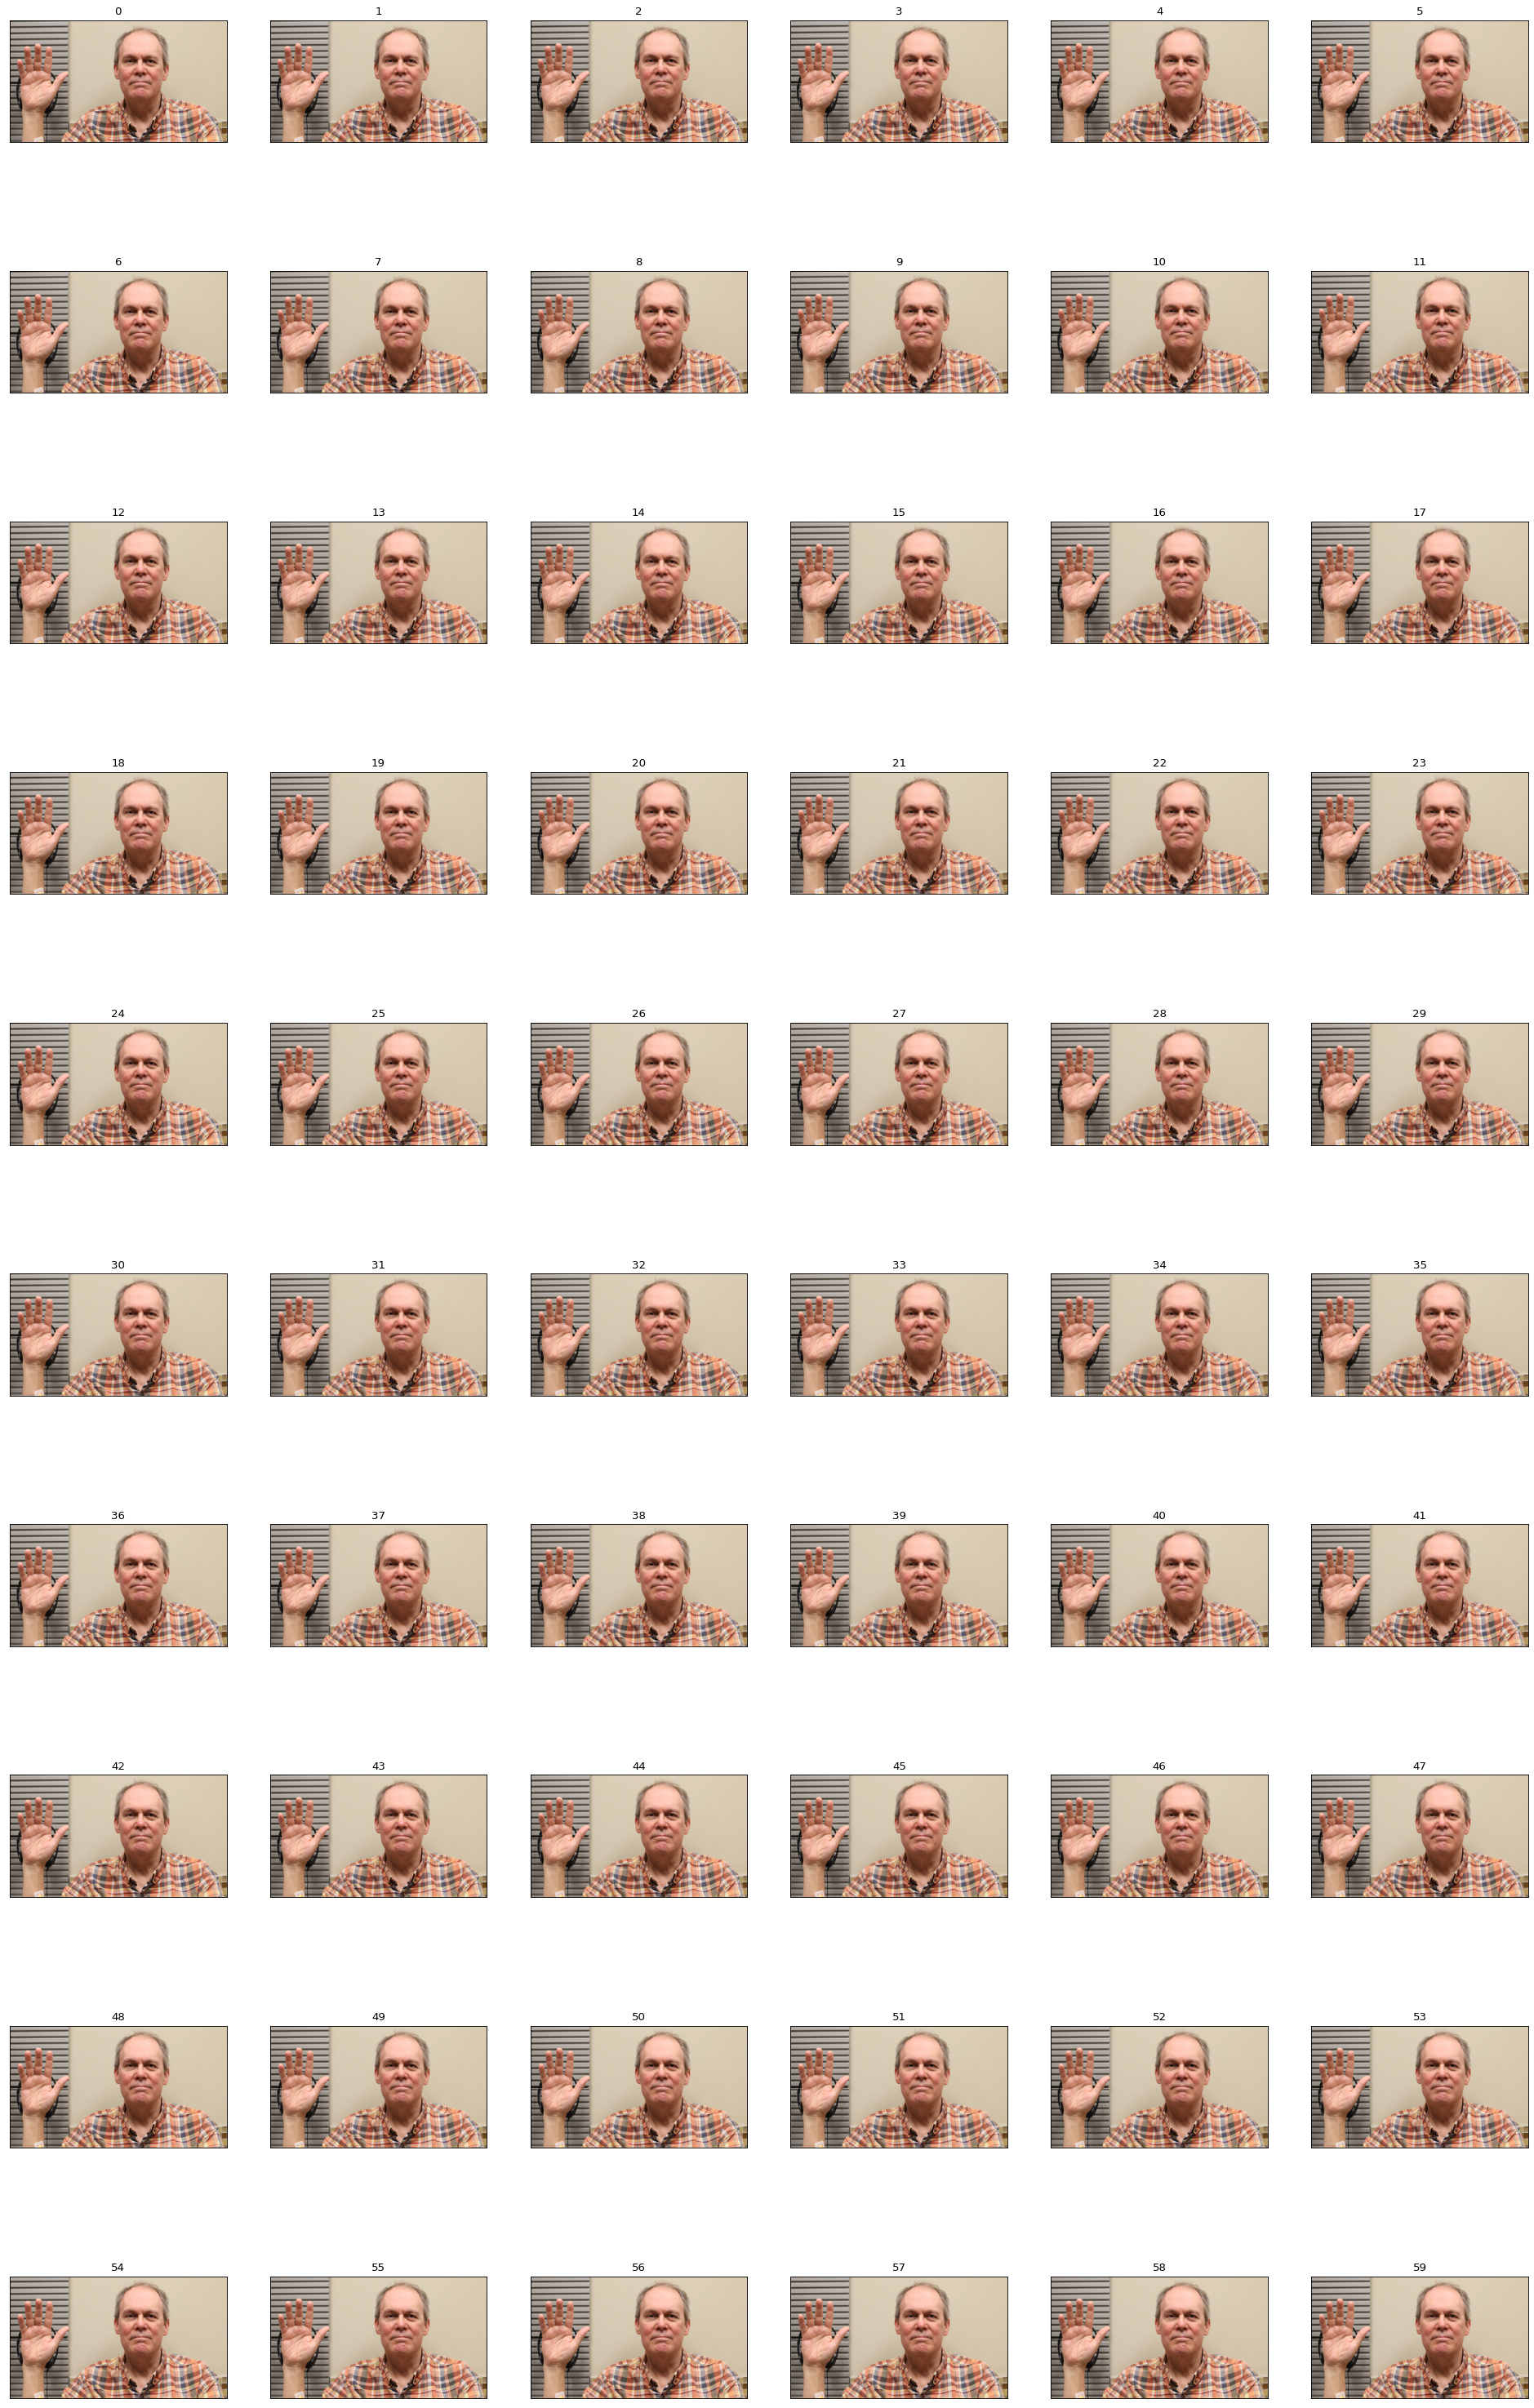

In [100]:
selected_frame, selected_frame_idx = find_flash_frame(all_video_path[0], 0, 1, fs=60)
plt.imshow(selected_frame)
plt.show()

In [18]:
# %matplotlib notebook
# %matplotlib widget
# from matplotlib import pyplot as plt
# import numpy as np

# imsp0 = np.random.rand(10,10)
# imsp1 = np.random.rand(10,10)

# fig = plt.figure()

# ax  = fig.add_subplot(121)
# ax.imshow(imsp0)

# ax2 = fig.add_subplot(122)
# ax2.imshow(imsp1)

# def onclick_select(event):
#     print('hahhaha')
#     if event.inaxes == ax:
#         out = 2
#     elif event.inaxes == ax2:
#         out = 3
#     return out

# click_map = dict([(a, b) for a, b in zip([1, 3], [1, 2])])

# def onclick(self, event):
#     """Mouse click event handler, will update an image if the user left or right clicks"""
#     if event.button in click_map.keys():  # if mouse click occurs
#         # loop through each image on the grid
#         if event.inaxes == ax:
#             print('first')
#         elif event.inaxes == ax2:
#             print('second')

        
# fig.canvas.mpl_connect("button_press_event",onclick)

# plt.show()
# print('ss')